In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("interviewer_ratingSheet1.csv", index_col = "sr no.")
df

,interviewer,studentid,rating
sr no.,,,
1,10,1,4
2,10,2,4
3,10,3,4
4,10,4,5
5,10,5,3
6,20,1,4
7,20,2,3
8,20,3,3
9,20,4,3


In [ ]:
rank_df=df[['studentid','rating']].groupby('studentid').mean()
print(rank_df)

           rating
studentid        
1            4.50
2            3.50
3            3.75
4            4.50
5            3.75
6            3.25
7            4.00
8            3.75
9            4.50
10           3.25


In [ ]:
df1 = pd.read_csv("student.xlsx - Sheet1.csv",index_col='stuid')
df2 = pd.read_csv("student2.xlsx - Sheet1.csv",index_col='stuid',names=['stuid', 'name', 'marks'])
print(df1)
print(df2)

          name  marks
stuid                
1        Rajan     98
2       Revati     97
3       mugdha     57
4        Gauri     68
5      manjiri     70
          name  marks
stuid                
6      Atharva     98
7         Arti     97
8      Prakash     57
9       sanjay     68
10      pramod     35


In [ ]:
# Merge 2 dataframes
df3=pd.concat([df1,df2])
df3.index.names = ['studentid']
df3

,name,marks
studentid,,
1,Rajan,98
2,Revati,97
3,mugdha,57
4,Gauri,68
5,manjiri,70
6,Atharva,98
7,Arti,97
8,Prakash,57
9,sanjay,68


In [ ]:
# Merge 2 dataframes
# 1. what is interviewer average rating of each student
rank_df=df[['studentid','rating']].groupby('studentid').mean()
df5=pd.concat([df3,rank_df],axis=1)
df5

,name,marks,rating
studentid,,,
1,Rajan,98,4.50
2,Revati,97,3.50
3,mugdha,57,3.75
4,Gauri,68,4.50
5,manjiri,70,3.75
6,Atharva,98,3.25
7,Arti,97,4.00
8,Prakash,57,3.75
9,sanjay,68,4.50


In [ ]:
#Technology Column:
# 2. add a new column by name technology and assign values based on following rules
# if the marks of students >80 and rating > 4 then
# allocate Python project
# if rating > 3 and marks > 90 then assign java project
# if rating>4  then assign python training
# otherwise assign java training

def myconvert(rating,marks):
    if rating>4 and marks>80 :
        return 'Python Project'
    elif rating>3 and marks>90:
        return 'Java Project'
    elif rating>4:
        return 'Python Training'
    else:
        return 'Java Training'
df5['technology'] = df5.apply(lambda row: myconvert(row['rating'], row['marks']), axis=1)
df5

,name,marks,rating,technology
studentid,,,,
1,Rajan,98,4.50,Python Project
2,Revati,97,3.50,Java Project
3,mugdha,57,3.75,Java Training
4,Gauri,68,4.50,Python Training
5,manjiri,70,3.75,Java Training
6,Atharva,98,3.25,Java Project
7,Arti,97,4.00,Java Project
8,Prakash,57,3.75,Java Training
9,sanjay,68,4.50,Python Training


In [ ]:
#Location Column:
# 3. add a new column location and assign values based on following rules
# if student marks > 80 then location is pune:
#     <80 and > 70 then location is delhi
#     otherwise mumbai

def myconvert(marks):
    if marks>80 :
        return 'Pune'
    elif 70<=marks<=80:
        return 'Delhi'
    else:
        return 'Mumbai'
df5['location'] = df5['marks'].apply(myconvert)
df5

,name,marks,rating,technology,location
studentid,,,,,
1,Rajan,98,4.50,Python Project,Pune
2,Revati,97,3.50,Java Project,Pune
3,mugdha,57,3.75,Java Training,Mumbai
4,Gauri,68,4.50,Python Training,Mumbai
5,manjiri,70,3.75,Java Training,Delhi
6,Atharva,98,3.25,Java Project,Pune
7,Arti,97,4.00,Java Project,Pune
8,Prakash,57,3.75,Java Training,Mumbai
9,sanjay,68,4.50,Python Training,Mumbai


In [ ]:
# . plot pie chart locationwise

import pandas as pd
s1=pd.read_csv("student.xlsx - Sheet1.csv")
s2=pd.read_csv("student2.xlsx - Sheet1.csv",header=None)
#assign same names to the column
s2.columns=s1.columns
rating=pd.read_csv("interviewer_ratingSheet1.csv")
#rating.drop("rating",axis=0)
rating=rating.iloc[:,1:]
students=pd.concat([s1,s2],ignore_index=True)


#what is average rating of each student
g=rating.groupby('studentid')
for sid,data in g:
    print("Student id : ",sid)
    print(data)
    print("*"*60)

rdata=g['rating'].mean()
print(rdata)
df1=pd.DataFrame(rdata)
mergedata=pd.merge(students,df1,left_on='stuid',right_on='studentid')

#if the marks of students >80 and rating > 4 then
#allocate Python project
#if rating > 3 and marks > 90 then assign java project
#if rating>4  then assign python training
#otherwise assign java training
def myfunction(information):
    print("details",information)
    if information[0]>80 and information[1]>4:
        return 'Python Project'
    elif information[0]>90 and information[1]>3:
        return 'Java Project'
    elif information[1]>4:
        return 'Python Training'
    else:
        return 'Java Training'

mergedata['technology']=mergedata[['marks','rating']].apply(myfunction,axis=1)



#if student marks > 80 then location is pune:
#    <80 and > 70 then location is delhi
#    otherwise mumbai
def assignlocation(mks):
    if mks>80:
        return 'Pune'
    elif mks>=70:
        return 'Delhi'
    else:
        return 'Mumbai'
mergedata['location']=mergedata['marks'].apply(assignlocation)



#display  pie chart for how many students are
#allocated to mumbai, pune location and delhi location
import matplotlib.pyplot as plt
result=mergedata['location'].value_counts()
print(result)
plt.pie(result.values,labels=result.index,colors=['c','b','g'],startangle=90,explode=(0,0,0.1))
plt.show()

#minimum, max average, marks for each technology
mergedata['techname']=mergedata['technology'].map(lambda x:x.split(" ")[0])
print(mergedata)

FileNotFoundError: [Errno 2] No such file or directory: 'student.xlsx - Sheet1.csv'

<Axes: xlabel='technology', ylabel='count'>

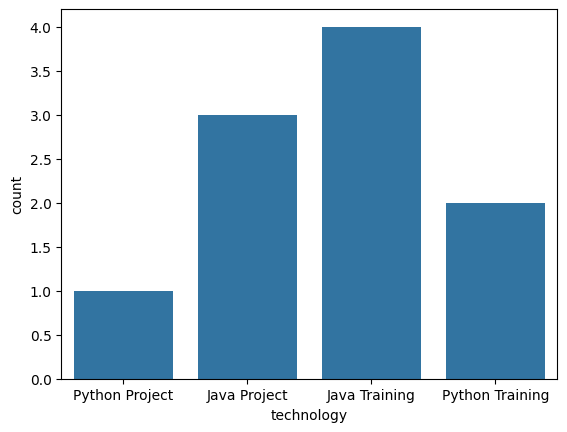

In [ ]:
# 5. plot a bar chart technologywise
sns.countplot(x="technology",data=df5)

In [ ]:
# Use pandas, numpy and matplotlib,seaborn
# 1. Use movies11.csv,movie12.csv,movie13.csv and rating11.csv file and solve following

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv("movies11.csv")
print(df1)

    movieId                                              title  \
0         1                                   Toy Story (1995)   
1         2                                     Jumanji (1995)   
2         3                            Grumpier Old Men (1995)   
3         4                           Waiting to Exhale (1995)   
4         5                 Father of the Bride Part II (1995)   
5         6                                        Heat (1995)   
6         7                                     Sabrina (1995)   
7         8                                Tom and Huck (1995)   
8         9                                Sudden Death (1995)   
9        10                                   GoldenEye (1995)   
10       11                     American President, The (1995)   
11       12                 Dracula: Dead and Loving It (1995)   
12       13                                       Balto (1995)   
13       14                                       Nixon (1995)   
14       1

In [ ]:
df2 = pd.read_csv("movie12.csv",header=None)
df2.columns = df1.columns
print(df2)

    movieId                                              title  \
0        41                                 Richard III (1995)   
1        42                             Dead Presidents (1995)   
2        43                                 Restoration (1995)   
3        44                               Mortal Kombat (1995)   
4        45                                  To Die For (1995)   
5        46               How to Make an American Quilt (1995)   
6        47                        Seven (a.k.a. Se7en) (1995)   
7        48                                  Pocahontas (1995)   
8        49                       When Night Is Falling (1995)   
9        50                         Usual Suspects, The (1995)   
10       51                              Guardian Angel (1994)   
11       52                            Mighty Aphrodite (1995)   
12       53                                    Lamerica (1994)   
13       54                              Big Green, The (1995)   
14       5

In [ ]:
df3 = pd.read_csv("movies13.csv",header=None)
df3.columns = df1.columns
print(df3)

       movieId                                              title  \
0           71                                   Fair Game (1995)   
1           72                       Kicking and Screaming (1995)   
2           73                             Misérables, Les (1995)   
3           74                                Bed of Roses (1996)   
4           75                                   Big Bully (1996)   
...        ...                                                ...   
10599    42015                                    Casanova (2005)   
10600    42018                     Mrs. Henderson Presents (2005)   
10601    42021                         White Countess, The (2005)   
10602    42053                                  Dirty Love (2005)   
10603    42094  Spirit of the Beehive, The (Espíritu de la col...   

                                      genres  
0                                     Action  
1                               Comedy|Drama  
2                             

In [ ]:
df4 = pd.read_csv("rating11.csv")
df4 = df4.sort_values('movieId',ignore_index=True)
df_ratings = df4
print(df_ratings)

       userId  movieId  rating   timestamp
0        4854        1     4.0  1385073530
1        2602        1     4.0   832138274
2         717        1     4.5  1055962113
3        5881        1     5.0   846469939
4        2601        1     4.0  1339591432
...       ...      ...     ...         ...
58005     415      157     3.0   984669379
58006    4330      157     3.0   955139258
58007    6447      157     3.0  1353625839
58008    4600      157     4.0  1059204213
58009    5223      157     3.0   828172818

[58010 rows x 4 columns]


In [ ]:
dfs = [df1, df2, df3]
df_movies = pd.concat(dfs, ignore_index=True)
df_movies.index = df.index + 1
print(df_movies)

       movieId                                              title  \
2            1                                   Toy Story (1995)   
3            2                                     Jumanji (1995)   
4            3                            Grumpier Old Men (1995)   
5            4                           Waiting to Exhale (1995)   
6            5                 Father of the Bride Part II (1995)   
...        ...                                                ...   
10671    42015                                    Casanova (2005)   
10672    42018                     Mrs. Henderson Presents (2005)   
10673    42021                         White Countess, The (2005)   
10674    42053                                  Dirty Love (2005)   
10675    42094  Spirit of the Beehive, The (Espíritu de la col...   

                                            genres  
2      Adventure|Animation|Children|Comedy|Fantasy  
3                       Adventure|Children|Fantasy  
4           

In [ ]:
# 2. find all masala movie - (action ,romance,comedy,thriller)

genrelst = ["Action" , "Romance", "Comedy", "Thriller"]
S = set(genrelst)

# selecting rows based on condition
df['check'] = [bool(S.intersection(x.split('|'))) for x in df['genres']]
print(df)
rslt_df = df[df['check']==True]

# test["Check"] = [bool(S.intersection(x)) for x in test['allDx']]
# test["Check"] = [not S.isdisjoint(x) for x in test['allDx']] -> Faster

print('\nResult dataframe :\n',
      rslt_df)

                                                   title  \
1                                       Toy Story (1995)   
2                                         Jumanji (1995)   
3                                Grumpier Old Men (1995)   
4                               Waiting to Exhale (1995)   
5                     Father of the Bride Part II (1995)   
...                                                  ...   
10670                                    Casanova (2005)   
10671                     Mrs. Henderson Presents (2005)   
10672                         White Countess, The (2005)   
10673                                  Dirty Love (2005)   
10674  Spirit of the Beehive, The (Espíritu de la col...   

                                            genres  check  
1      Adventure|Animation|Children|Comedy|Fantasy   True  
2                       Adventure|Children|Fantasy  False  
3                                   Comedy|Romance   True  
4                             Comedy|Dr

          Genre  Count
0        Comedy   3672
1         Drama   2732
2       Romance   1808
3      Thriller   1711
4        Action   1474
5         Crime    913
6     Adventure    682
7        Horror    566
8        Sci-Fi    521
9       Mystery    429
10      Fantasy    377
11      Musical    295
12     Children    276
13          War    261
14    Animation    140
15      Western    128
16    Film-Noir     71
17  Documentary     34
18         IMAX     10


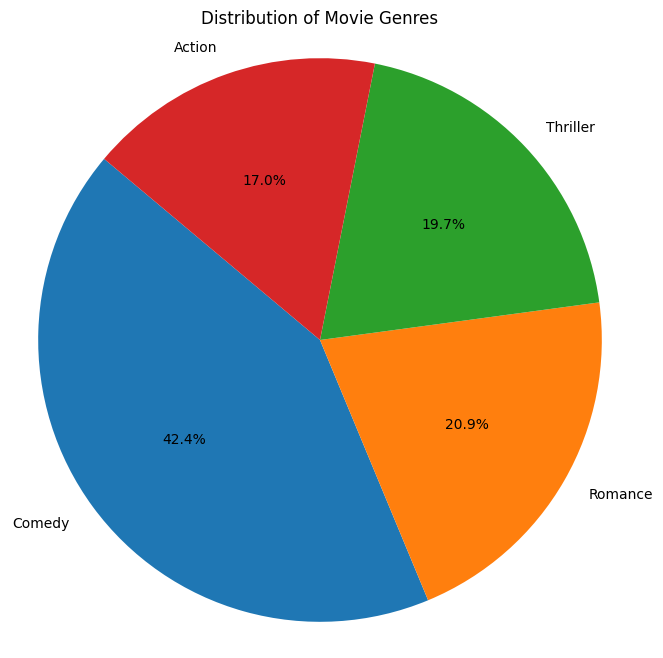

In [ ]:
# 3. plot a pie chart to represent genre and frequency of movie count

# #To create a new dataframe consisting of Genre and movie falling in that genres' count.
# genre_dict = {"Action" : 0 , "Romance": 0, "Comedy": 0, "Thriller" : 0}
# def assigngenre(genre):
#   for k in genre_dict.keys():
#     if k in genre.split('|'):
#         genre_dict[k] += 1



# Split the genres and explode them into separate rows
genres_split = rslt_df['genres'].str.split('|', expand=True).stack()

# Count the occurrences of each genre
genre_counts = genres_split.value_counts().reset_index()

# Rename the columns
genre_counts.columns = ['Genre', 'Count']

print(genre_counts)


import matplotlib.pyplot as plt

# Filter for the desired genres
desired_genres = ['Action', 'Comedy', 'Thriller', 'Romance']
filtered_genres = genre_counts[genre_counts['Genre'].isin(desired_genres)]

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(filtered_genres['Count'], labels=filtered_genres['Genre'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Movie Genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



In [ ]:
# 4. find average rating for each movie then merge 2 frames, display movieid,name,rating
# Calculate average rating for each movie
average_ratings = df_ratings.groupby('movieId')['rating'].mean().reset_index()

# Merge the movie data with average ratings
merged_df = pd.merge(df_movies, average_ratings, on='movieId', how='inner')

# Display movie ID, name, and average rating
print(merged_df[['movieId', 'title', 'rating']])



     movieId                                     title    rating
0          1                          Toy Story (1995)  3.959323
1          2                            Jumanji (1995)  3.268398
2          3                   Grumpier Old Men (1995)  3.186861
3          4                  Waiting to Exhale (1995)  3.000000
4          5        Father of the Bride Part II (1995)  3.143836
..       ...                                       ...       ...
124      153                     Batman Forever (1995)  2.921099
125      154  Beauty of the Day (Belle de jour) (1967)  3.794798
126      155                     Beyond Rangoon (1995)  3.440678
127      156                   Blue in the Face (1995)  3.505556
128      157                     Canadian Bacon (1995)  2.729927

[129 rows x 3 columns]


In [ ]:
# 5. draw pie chart for each genre and average rating

# Calculate average rating for each genre
genre_avg_ratings = merged_df.groupby('genres')['rating'].mean().reset_index()

# Plot pie chart for each genre
for index, row in genre_avg_ratings.iterrows():
    plt.figure(figsize=(8, 8))
    plt.pie([row['rating'], 5 - row['rating']], labels=['Average Rating', ''], autopct='%1.1f%%', startangle=140)
    plt.title('Average Rating for ' + row['genres'])
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

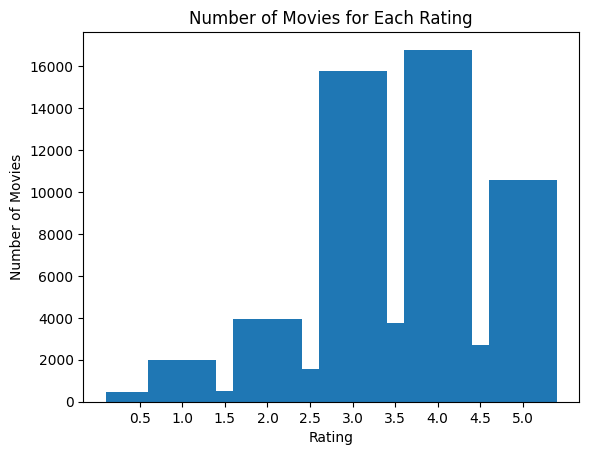

In [ ]:
# 6. draw bar graph for each rating and number of movies

rating_counts = df_ratings['rating'].value_counts().sort_index()

# Plot bar graph
plt.bar(rating_counts.index, rating_counts.values)
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.title('Number of Movies for Each Rating')
plt.xticks(rating_counts.index)
plt.show()